In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# settings
sns.set_style("darkgrid")
figure_path = "figs" + os.sep
ID = "0508"
file_structure = False

In [3]:
# colors we use in the figures
print(sns.color_palette('colorblind').as_hex())

['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494', '#ece133', '#56b4e9']


In [4]:
# Here we load the data
if not file_structure:
    file_name = "../results/results_" + ID + ".csv"
    data = pd.read_csv(file_name, index_col = None)
else:
    directory = "../results/results_" + ID
    idx = 0
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if not filename.endswith(".csv"):
            continue
        newdata = pd.read_csv(f, index_col = None)
        if idx == 0:
            data = newdata
        else:
            data = pd.concat([data, newdata], ignore_index=True)
        idx += 1

In [5]:
# check the column names
print(data.columns)

Index(['init_tom', 'resp_tom', 'init_lr', 'resp_lr', 'init_canSendMessages',
       'resp_canSendMessages', 'init_canLie', 'resp_canLie', 'init_initPoints',
       'resp_initPoints', 'init_finalPoints', 'resp_finalPoints', 'init_gain',
       'resp_gain', 'nr_offers', 'outcome_is_StrictPE', 'outcome_is_highestSW',
       'outcome_is_new_distribution',
       'there_is_better_outcome_than_initial_situ', 'reached_max_num_offers',
       'passed_time'],
      dtype='object')


In [6]:
av_data = data.groupby(["init_tom", "resp_tom", "init_canSendMessages", "resp_canSendMessages", "init_canLie", "resp_canLie"]).mean()
# data = data[data["outcome"]] only configure situations where there is a better outcome.
pd.set_option('display.max_rows', None)
print(av_data[["init_gain"]])
# pd.reset_option('display.max_rows')

                                                                                     init_gain
init_tom resp_tom init_canSendMessages resp_canSendMessages init_canLie resp_canLie           
0        0        False                False                False       False            72.35
                                       True                 False       False           140.20
                                                                        True            230.25
                  True                 False                False       False            62.55
                                                            True        False            69.90
                                       True                 False       False           127.50
                                                                        True            130.05
                                                            True        False            34.80
                                                  

In [7]:
# BOXPLOT
# df_init0_mean = df_init0.groupby(["resp_tom", "resp_canLie"]).mean()
# df_init0_se = df_init0.groupby(["resp_tom", "resp_canLie"]).sem()
# names = ["ToM=" + ",\nlying=".join(map(str, name)) for name in list(df_init0_mean.index)]

# plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
# plt.bar(names, df_init0_mean["init_gain"], width = 0.4)
# plt.errorbar(names, df_init0_mean["init_gain"], yerr=df_init0_se["init_gain"], fmt='.', ecolor='red', color='blue')
# plt.ylabel('Initiator gain', size=16)
# plt.xlabel('Responder type', labelpad=10, size=16)

In [55]:
# figure settings
figsize = (10,10)
label_names = ["ToM=0,canLie=False", "ToM=1,canLie=False", "ToM=2,canLie=False", "ToM=2,canLie=True"]
fig_label_names = ["ToM=0,\ncan lie=False", "ToM=1,\ncan lie=False", "ToM=2,\ncan lie=False", "ToM=2,\ncan lie=True"]
TICK_SIZE = 22

LABEL_SIZE = 30
TITLE_SIZE = 30
RIGHT_LIM = 900
LEFT_LIM = -50

BIN_WIDTH = 0.4
INNER_HALFSPACE = 0.25
BETWEEN_SPACE = 0.75

Y_TICKS = [(1 + INNER_HALFSPACE*2) + x*(BETWEEN_SPACE+2*INNER_HALFSPACE) for x in range(4)]

meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor=sns.color_palette('colorblind')[2], markersize=10)

In [9]:
# Miscellaneous functions:


In [53]:
# function for setting the colors of the box plots pairs
def make_box_plot(data, pos, ax):
    fill_colors = [sns.color_palette('colorblind')[0], sns.color_palette('colorblind')[1]]
    edge_colors = ["black", "black"]

    bp = ax.boxplot(data, patch_artist=True, notch=False, vert=0, showfliers=True,
                    positions=pos, widths=BIN_WIDTH, showmeans=True, meanprops=meanpointprops)
    
    for element in ['whiskers', 'caps', 'medians', "boxes", 'fliers', 'means']:
        plt.setp(bp[element][0], color=edge_colors[0])
        plt.setp(bp[element][1], color=edge_colors[1])

    bp['boxes'][0].set(facecolor=fill_colors[0])
    bp['boxes'][1].set(facecolor=fill_colors[1])
    
    return bp
    

def make_multiple_boxplots(df, y_label, title):
    plot_list = []
    for label_name in label_names:
        plot_list.append([list(df[df["id"] == label_name]["resp_gain"]),
                          list(df[df["id"] == label_name]["init_gain"])])
        
    fig = plt.figure(figsize = figsize)
    ax = fig.add_subplot(111)

    make_box_plot(plot_list[0], [Y_TICKS[0]-INNER_HALFSPACE, Y_TICKS[0]+INNER_HALFSPACE], ax)
    make_box_plot(plot_list[1], [Y_TICKS[1]-INNER_HALFSPACE, Y_TICKS[1]+INNER_HALFSPACE], ax)
    make_box_plot(plot_list[2], [Y_TICKS[2]-INNER_HALFSPACE, Y_TICKS[2]+INNER_HALFSPACE], ax)
    bp = make_box_plot(plot_list[3], [Y_TICKS[3]-INNER_HALFSPACE, Y_TICKS[3]+INNER_HALFSPACE], ax)

    ax.set_yticks(Y_TICKS)
    ax.set_yticklabels(fig_label_names)
    ax.tick_params(axis='both', labelsize=TICK_SIZE)
    ax.set_xlim(left=LEFT_LIM, right=RIGHT_LIM)
    ax.set_ylim((None, ax.get_yticks()[-1] + 1))
    ax.legend((bp['boxes'][1], bp['boxes'][0], bp['means'][0]), ("Init", "Resp", "Mean"), fontsize=TICK_SIZE, ncol=3, fancybox=True, loc="upper right")
    ax.xaxis.grid(True, which="both")
    ax.yaxis.grid(False, which="both")
    
    
    fig.supxlabel('Score gain', fontsize=LABEL_SIZE)
    fig.supylabel(y_label, x=0, fontsize=LABEL_SIZE)
    fig.suptitle(title, fontstyle='italic', fontsize=TITLE_SIZE)
    fig.tight_layout()
    plt.minorticks_on()

def make_boxplot_init(data, title):
    # https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
    df = data[["resp_tom", "resp_canLie", "init_gain", "resp_gain"]].copy()
    df["id"] = df.apply(lambda x: "ToM=" + str(x['resp_tom']) + ",canLie=" + str(x['resp_canLie']), axis=1)
    df = df[["id", "init_gain", "resp_gain"]]
    
    make_multiple_boxplots(df, "Responder type", title)
    
    
def make_boxplot_resp(data, title):

    df = data[["init_tom", "init_canLie", "init_gain", "resp_gain"]]
    df['id'] = "ToM=" + df['init_tom'].astype(str) + ",canLie=" + df['init_canLie'].astype(str)
    df = df[["id", "init_gain", "resp_gain"]]

    make_multiple_boxplots(df, "Initiator type", title)

In [11]:
def make_violin_plot(data, pos, ax):
    # fill_colors = [sns.color_palette('colorblind')[0], sns.color_palette('colorblind')[1]]
    # edge_colors = ["black", "black"]

    bp = ax.violinplot(data, vert=0, positions=pos, widths=BIN_WIDTH)
    
    for pc in bp['bodies']:
        print(pc)
    
    return bp

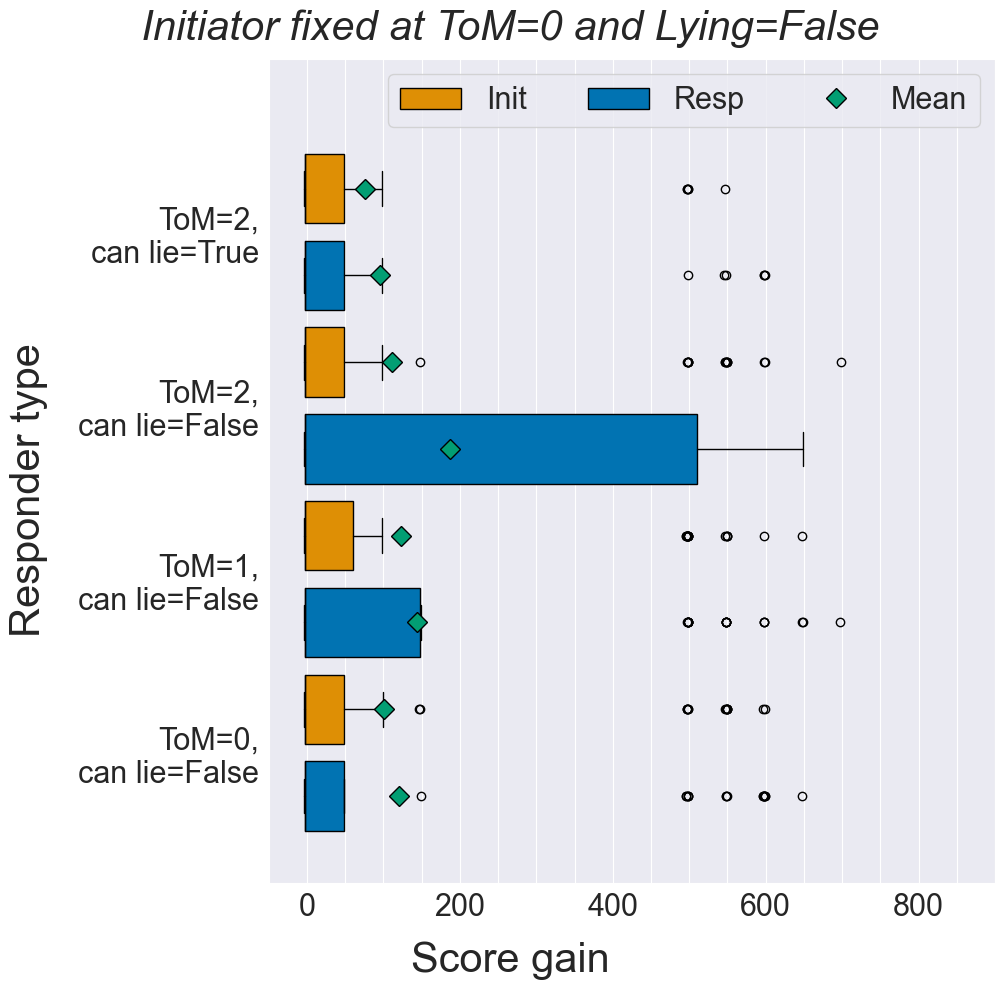

init_gain  \
init_tom resp_tom init_canSendMessages resp_canSendMessages init_canLie resp_canLie              
0        0        False                False                False       False            72.35   
                                       True                 False       False           140.20   
                                                                        True            230.25   
                  True                 False                False       False            62.55   
                                       True                 False       False           127.50   
                                                                        True            130.05   
         1        False                False                False       False           182.70   
                                       True                 False       False            39.95   
                                                                        True            205.10   
                  True                 False                False       False           139.85   
                                       True                 False       False           127.25   
                                                                        True             94.85   
         2        False                False                False       False           100.00   
                                       True                 False       False            67.25   
                                                                        True             89.85   
                  True                 False                False       False           125.30   
                                       True                 False       False           150.40   
                                                                        True             62.65   

                                                                                     resp_gain  
init_tom resp_tom init_canSendMessages resp_canSendMessages init_canLie resp_canLie             
0        0        False                False                False       False           114.85  
                                       True                 False       False            72.70  
                                                                        True            127.75  
                  True                 False                False       False           112.55  
                                       True                 False       False           182.50  
                                                                        True            225.05  
         1        False                False                False       False           135.20  
                                       True                 False       False           122.45  
                                                                        True            202.60  
                  True                 False                False       False            99.85  
                                       True                 False       False           219.75  
                                                                        True            174.85  
         2        False                False                False       False           225.00  
                                       True                 False       False            89.75  
                                                                        True             97.35  
                  True                 False                False       False           250.30  
                                       True                 False       False           182.90  
                                                                        True             92.65

In [56]:
df_init0 = data.loc[(data["init_tom"] == 0) & (data["init_canLie"] == False)]

make_boxplot_init(df_init0, "Initiator fixed at ToM=0 and Lying=False")
plt.savefig(figure_path + "savedfig_init0_" + ID + ".pdf")
plt.show()

df_init0.groupby(["init_tom", "resp_tom", "init_canSendMessages", "resp_canSendMessages", "init_canLie", "resp_canLie"])[["init_gain", "resp_gain"]].mean()

In [ ]:
df_resp0 = data.loc[(data["resp_tom"] == 0) & (data["resp_canLie"] == False)]
make_boxplot_resp(df_resp0, "Responder fixed at ToM=0 and Lying=False")
plt.savefig(figure_path + "savedfig_resp0_" + ID + ".pdf")
plt.show()
